# Impot dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
# loading the data
data=pd.read_csv('titanic_train.csv')

In [3]:
#First five rows of data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Number of rows and columns
data.shape

(891, 12)

In [5]:
# Data imformation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#check the missing value in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#drop the cabin column
data=data.drop(columns='Cabin')

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
#replacing missing values in age column with mean value
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
# finding the mode value for Embarked
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [12]:
# replacing missing value in Embarked column with mode value
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
#Getting some statistical measure of data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# number of people survived and not survived
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualisation

<AxesSubplot:xlabel='Survived', ylabel='count'>

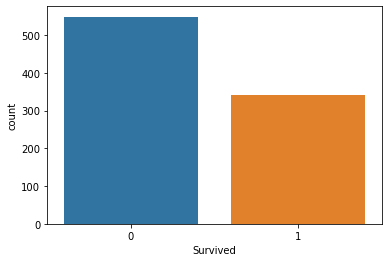

In [16]:
#making a count plot for 'Survived' column
sns.countplot('Survived', data=data)

In [17]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

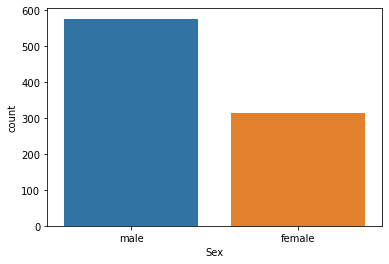

In [18]:
#making a count plot for 'Sex' column
sns.countplot('Sex', data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

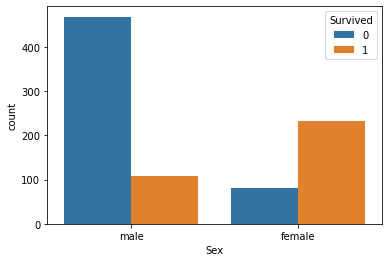

In [19]:
#making a count plot for number of surviver gender wise
sns.countplot('Sex', hue='Survived', data=data)

In [20]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

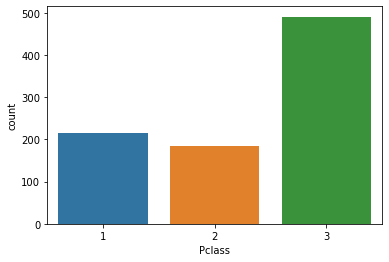

In [21]:
#making a count plot for 'Pclass' column
sns.countplot('Pclass', data=data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

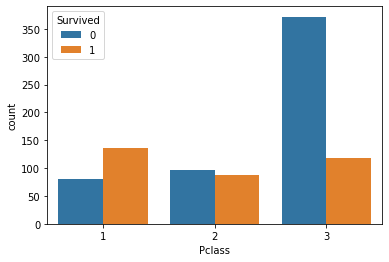

In [22]:
#making a count plot for surviver according to Pclass
sns.countplot('Pclass',hue='Survived', data=data)

# Encoding categorical columns

In [23]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Seperating feature and target

In [27]:
x=data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=data['Survived']

In [28]:
print('X is', x)
print('Y is',y)

X is      Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
Y is 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [29]:
logmodel = LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=i)
    logmodel.fit(x_train,y_train)
    pred_train=logmodel.predict(x_train)
    pred_test=logmodel.predict(x_test) 
    if (accuracy_score(y_train,pred_train)*100>81 and accuracy_score(y_test,pred_test)*100>81):
                      print("At random state", i ,"the training accuracy is", accuracy_score(y_train,pred_train))
                      print("At random state", i ,"the training accuracy is", accuracy_score(y_test,pred_test))
                      print("\n")
                      
    
    

At random state 62 the training accuracy is 0.8132022471910112
At random state 62 the training accuracy is 0.8156424581005587


At random state 182 the training accuracy is 0.8117977528089888
At random state 182 the training accuracy is 0.8100558659217877


At random state 219 the training accuracy is 0.8103932584269663
At random state 219 the training accuracy is 0.8100558659217877


At random state 563 the training accuracy is 0.8117977528089888
At random state 563 the training accuracy is 0.8100558659217877


At random state 756 the training accuracy is 0.8103932584269663
At random state 756 the training accuracy is 0.8156424581005587




At random state 62 we are having best accuracy of the model

In [30]:
#Spliting the data into test and train set
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=62)

In [31]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


# Model Training

Logistic regression

In [32]:
# training the logistic regression model with training data
logmodel.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

Accuracy score

In [33]:
#accuracy on training data
pred_train = logmodel.predict(x_train)

In [34]:
pred_train

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,

In [36]:
training_accuracy=accuracy_score(y_train,pred_train)

In [37]:
training_accuracy

0.8132022471910112

In [38]:
#accuracy on training data
pred_test = logmodel.predict(x_test)

In [39]:
pred_test

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [40]:
print(accuracy_score(y_test,pred_test))

0.8156424581005587


In [41]:
from sklearn.metrics import classification_report


In [42]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       102
           1       0.87      0.68      0.76        77

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



# Cross validation of the model

In [43]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(logmodel,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"AT cross fold {j} the cv score is {cv_mean}")
    print('\n')

AT cross fold 2 the cv score is 0.7923666045246133


AT cross fold 3 the cv score is 0.7923681257014591


AT cross fold 4 the cv score is 0.7968832060760311


AT cross fold 5 the cv score is 0.7946142740568704


AT cross fold 6 the cv score is 0.7991111917286413


AT cross fold 7 the cv score is 0.7935092097862767


AT cross fold 8 the cv score is 0.7979810167310167


AT cross fold 9 the cv score is 0.7934904601571268




In [44]:
cv_score=cross_val_score(logmodel,x,y,cv=j)
cv_mean=cv_score.mean()
print(f"AT cross fold {j} the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test)-cv_mean)

AT cross fold 9 the cv score is 0.7934904601571268
Difference between accuracy and validation score 0.022151997943431923


At cross fold 6 we are getting nearest value to our accuracy score. Hence we will use this value.

# Ensemble Technique

In [45]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

In [46]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
pred_test_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,pred_test_rfc))
print(confusion_matrix(y_test,pred_test_rfc))
print(classification_report(y_test,pred_test_rfc))

0.7988826815642458
[[87 15]
 [21 56]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       102
           1       0.79      0.73      0.76        77

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [48]:
pred_test_rfc

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [49]:
print(accuracy_score(y_test,pred_test_rfc))

0.7988826815642458


In [50]:
# cross validation of RandomForestClassifier model
cv_score=cross_val_score(rfc,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_rfc)-cv_mean)

AT cross fold 6 the cv score is 0.8226767035491868
Difference between accuracy and validation score -0.02379402198494096


GradientBoostingClassifier

In [51]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred_test_gb=gb.predict(x_test)
print(accuracy_score(y_test,pred_test_gb))
print(confusion_matrix(y_test,pred_test_gb))
print(classification_report(y_test,pred_test_gb))

0.8379888268156425
[[95  7]
 [22 55]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       102
           1       0.89      0.71      0.79        77

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179



In [52]:
# cross validation of GradientBoostingClassifier model
cv_score=cross_val_score(gb,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_gb)-cv_mean)

AT cross fold 6 the cv score is 0.8271660922667635
Difference between accuracy and validation score 0.010822734548878943


AdaBoostClassifier

In [53]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred_test_ada=ada.predict(x_test)
print(accuracy_score(y_test,pred_test_ada))
print(confusion_matrix(y_test,pred_test_ada))
print(classification_report(y_test,pred_test_ada))

0.8212290502793296
[[89 13]
 [19 58]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       102
           1       0.82      0.75      0.78        77

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.82      0.82      0.82       179



In [54]:
# cross validation of AdaBoostClassifier model
cv_score=cross_val_score(ada,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_ada)-cv_mean)

AT cross fold 6 the cv score is 0.8047342644658082
Difference between accuracy and validation score 0.016494785813521373


BaggingClassifier

In [55]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
pred_test_bag=bag.predict(x_test)
print(accuracy_score(y_test,pred_test_bag))
print(confusion_matrix(y_test,pred_test_bag))
print(classification_report(y_test,pred_test_bag))

0.7877094972067039
[[86 16]
 [22 55]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       102
           1       0.77      0.71      0.74        77

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [56]:
# cross validation of BaggingClassifier model
cv_score=cross_val_score(bag,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_bag)-cv_mean)

AT cross fold 6 the cv score is 0.8137205997944252
Difference between accuracy and validation score -0.026011102587721324


ExtraTreesClassifier

In [57]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_test_etc=etc.predict(x_test)
print(accuracy_score(y_test,pred_test_etc))
print(confusion_matrix(y_test,pred_test_etc))
print(classification_report(y_test,pred_test_etc))


0.8100558659217877
[[88 14]
 [20 57]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       102
           1       0.80      0.74      0.77        77

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [58]:
# cross validation of ExtraTreesClassifier model
cv_score=cross_val_score(etc,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_etc)-cv_mean)

AT cross fold 6 the cv score is 0.8025046858939477
Difference between accuracy and validation score 0.007551180027839943


Support Vector Classifier

In [59]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_test_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_test_svc))
print(confusion_matrix(y_test,pred_test_svc))
print(classification_report(y_test,pred_test_svc))


0.6145251396648045
[[94  8]
 [61 16]]
              precision    recall  f1-score   support

           0       0.61      0.92      0.73       102
           1       0.67      0.21      0.32        77

    accuracy                           0.61       179
   macro avg       0.64      0.56      0.52       179
weighted avg       0.63      0.61      0.55       179



In [60]:
# cross validation of RandomForestClassifier model
cv_score=cross_val_score(svc,x,y,cv=6)
cv_mean=cv_score.mean()
print(f"AT cross fold 6 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_svc)-cv_mean)

AT cross fold 6 the cv score is 0.6745722232299415
Difference between accuracy and validation score -0.060047083565136994


# Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

parameters={
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators":[10,20,30]
    }

In [62]:
clf=GridSearchCV(GradientBoostingClassifier(),parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 30}


In [71]:
final_model=GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, max_depth= 5, max_features ='log2', n_estimators= 30)
final_model.fit(x_train, y_train)
results=final_model.predict(x_test)
print(accuracy_score(y_test,results)*100)

84.35754189944134


# AUC ROC curve

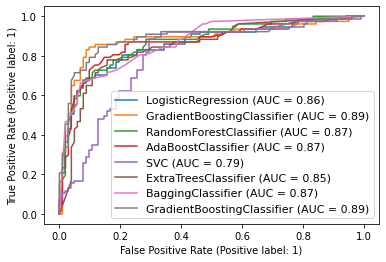

In [72]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(logmodel,x_test, y_test)
plot_roc_curve(gb,x_test, y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test, y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test, y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test, y_test,ax=disp.ax_)
plot_roc_curve(etc,x_test, y_test,ax=disp.ax_)
plot_roc_curve(bag,x_test, y_test,ax=disp.ax_)
plot_roc_curve(final_model,x_test, y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

# Model Saving

In [73]:
import pickle
filename='titanic_survial.pkl'
pickle.dump(final_model, open(filename,'wb'))

# Conclusion

In [74]:
a=np.array(y_test)
predicted=np.array(results)
df=pd.DataFrame({'Original':a,'Predicted':predicted})

In [75]:
df

,Original,Predicted
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
174,1,0
175,0,0
176,0,0
177,0,0
